## Importing Libraries

In [1]:
import keras
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from termcolor import colored
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

#Classifiers
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Importing Dataset

In [2]:
df_path = '/kaggle/input/7-classes-sinhala-preprocessed-dataset/7 Classes (Preprocessed Dataset).csv'

In [3]:
df = pd.read_csv(df_path)

In [4]:
df.head()

,Labels,Paragraph
0,1,බැරේරා ශූරතා සඳහා මොරාල්ස් අභිබවා යයි කෙසේ හෝ ...
1,1,අවසානය සමඟ එකඟතාවය පැමිණේ ඇම්ස්ටර්ඩෑම් නෙදර්ලන...
2,1,ලබන්නා වන බ්රහස්පතින්දා උගුර අමාරුවක සමඟ පුහුණ...
3,1,පවසන්නේ ඔහු රොකට් වලට වෙළඳාම කරන බව උපස්ථ කරනු...
4,1,ක්රීඩා ජාලය හදිසියේ අරගල කරන ලොස් ඇන්ජලීස් ක්ල...


In [5]:
df.columns = ['Class Index', 'Paragraph']

## Labels

In [6]:
labels = ['Sports', 'Business & Economics', 'Science & Technology', 'Wellness', 'Politics', 'Travel', 'Entertainment']

## Checking Missing Values

In [7]:
df.isnull().sum()

Class Index    0
Paragraph      2
dtype: int64

In [8]:
df = df.dropna(subset=["Paragraph"])

In [9]:
df.isnull().sum()

Class Index    0
Paragraph      0
dtype: int64

## Splitting Data

In [10]:
df.shape

(69416, 2)

In [11]:
X = df['Paragraph']
y = df['Class Index']

In [12]:
df['Class Index'].value_counts()

1    10000
2    10000
3    10000
4    10000
5    10000
7     9998
6     9418
Name: Class Index, dtype: int64

In [13]:
print(X)

0        බැරේරා ශූරතා සඳහා මොරාල්ස් අභිබවා යයි කෙසේ හෝ ...
1        අවසානය සමඟ එකඟතාවය පැමිණේ ඇම්ස්ටර්ඩෑම් නෙදර්ලන...
2        ලබන්නා වන බ්රහස්පතින්දා උගුර අමාරුවක සමඟ පුහුණ...
3        පවසන්නේ ඔහු රොකට් වලට වෙළඳාම කරන බව උපස්ථ කරනු...
4        ක්රීඩා ජාලය හදිසියේ අරගල කරන ලොස් ඇන්ජලීස් ක්ල...
                               ...                        
69413    කිසි විටෙක විලාසිතාවෙන් බැහැර නොවේ වසර කට පසුව...
69414    ජෙරමි පිවන් තවත් කාන්තාවන් දෙනෙකු ලිංගික අපචාර...
69415    විස්මිත රංගනයෙන් පසු කේට් මිඩ්ල්ටන්ගේ පියානෝ ක...
69416    ලතිෆා රැජින මව වන රීටා ඕවන්ස් හෘ තත්ත්වය සමඟ ස...
69417    පොප්කෝන් පෙරදසුන මම මිය යන විට පොප්කෝන් පැතිකඩ...
Name: Paragraph, Length: 69416, dtype: object


In [14]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
69413    7
69414    7
69415    7
69416    7
69417    7
Name: Class Index, Length: 69416, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
print(y_train)

12826    2
44175    5
43767    5
35387    4
47142    5
        ..
37194    4
6265     1
54886    6
860      1
15795    2
Name: Class Index, Length: 55532, dtype: int64


In [17]:
print(y_test)

53113    6
42415    5
8317     1
59753    7
17960    2
        ..
57176    6
63727    7
15075    2
1302     1
16546    2
Name: Class Index, Length: 13884, dtype: int64


In [18]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on y_train
label_encoder.fit(y_train)

# Encode the labels in y_train and y_test
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)


In [19]:
print(y_train)

[1 4 4 ... 5 0 1]


In [20]:
print(y_test)

[5 4 0 ... 1 0 1]


In [21]:
print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  55532
Test dataset:  13884


## Count Vectorizing

In [22]:
with open('/kaggle/input/stop-words/stop words.txt', 'r') as file:
    sinhala_stop_words = [line.strip() for line in file.readlines()]

In [23]:
count_vector = CountVectorizer(stop_words = sinhala_stop_words)

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['අන', 'අඳ', 'අප', 'අය', 'අරබය', 'අහ', 'ආය', 'ආහ', 'ඇත', 'ඇය', 'ඉක', 'ඉත', 'ඉඳ', 'උද', 'ඌය', 'එන', 'එනම', 'එබ', 'එහ', 'ඔන', 'ඕහ', 'කල', 'ටන', 'තට', 'තර', 'තවත', 'දක', 'නට', 'නම', 'පටන', 'පත', 'පර', 'පව', 'බඳ', 'බඳව', 'බල', 'බවත', 'මග', 'මන', 'යල', 'වක', 'වට', 'වඩ', 'වත', 'වශය', 'වස', 'වහ', 'සඳහ', 'හන'] not in stop_words.
  % sorted(inconsistent)


**Saving the count vectorizer**

In [24]:
joblib.dump(count_vector, '7_classes_count_vectorizer.pkl')

['7_classes_count_vectorizer.pkl']

## Unseen Data for Predicting

In [25]:
paragraphs = [
             'T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ',
             'නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද?',
             'වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි',
             'ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම.',
             'නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි',
             'IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම',
             '#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද?',
             'Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය.',
             'කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න',
             'ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත',
             'මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලියට සහභාගී වන ශ්‍රි ලංකා කාන්තා ක්‍රිකට් කණ්ඩායම අද අලුයම දකුණු අප්‍රිකාව බලා පිටත්ව ගොස් තිබේ.',
             '2023 පළාත් පාලන මැතිවරණයට අදාළව තැපැල් ඡන්දය සලකුණු කිරීමේ දින මැතිවරණ කොමිසම විසින් ප්‍රකාශයට පත්කර තිබේ.',
             'දිවයින හරහා ගමන් කරමින් පැවති පීඩන අවපාතය ඊයේ රාත්‍රියේ අඩු පීඩන කලාපයක් බවට පත්ව දිවයිනෙන් ඉවතට ගමන්කර ඇති බව කාලගුණවිද්‍යා දෙපාර්තමේන්තුව පවසයි.'
             'රජයේ නව බදු ප්‍රතිපත්තියට එරෙහිව කටුනායක බණ්ඩාරනායක ජාත්‍යන්තර ගුවන් තොටුපොළේ වෘත්තිය සමිති නියෝජිතයින් අද (02) දහවල් කෑම පැයේදී විරෝධතාවයේ නිරතවිය.',
             'පැරිස් සමාජයට අයත් ණයහිමි රටවල් ජාත්‍යන්තර මූල්‍ය අරමුදලෙන් ශ්‍රී ලංකාවට ණය පහසුකම ලබාගැනීම සඳහා අදාළ ණය සහතිකය කඩිනමින් ප්‍රකාශයට පත්කිරීමට නියමිත බව රොයිටර්ස් පුවත් සේවය අද (02) අනාවරණ කළේය.',
             'ඇපල් සහ ගූගල් සමාගම් මගින් පාලනය කරන "Play Store"වලින් ටික් ටොක් ඉවත් කරන ලෙසට අමෙරිකානු සෙනෙට් සභිකයෙක් ඉල්ලීමක් කර තිබේ.',
             'කුරුණෑගල මහ නගර සභාවේ නව නගරාධිපති ධුරය සඳහා සමගි ජනබලවේගයේ පක්ෂයේ සුමේද අරුණ ශාන්ත මහතා තේරීපත්ව තිබේ.',
             'තම කණ්ඩායමේ ක්‍රීඩිකාවන් උපරිම දක්ෂතාවල සිටියොත් ලෝකයේ ඕනෑම කණ්ඩායමක් පරාජය කළ හැකි බව ශ්‍රී ලංකා කණ්ඩායමේ නායිකා චමරි අතපත්තු පැවසුවාය.',
             'විදෙස් ජාතික නැවියන් දෙදෙනෙක් හදිසියේ මියයෑමේ සිදුවීමක් පිළිබඳ ගාල්ල වරාය පොලීසියට පැමිණිල්ලක් ලැබී තිබේ.',
             'ලෝක තෙත්බිම් දිනය අදට (02) යෙදී තිබේ.',
             'නිරිතදිග බෙංගාල බොක්ක මුහුදු ප්‍රදේශයේ පැවති පීඩන අවපාතය නැගෙනහිර වෙරළ දෙසින් දිවයිනයට ඇතුළු වී ශ්‍රී ලංකාව හරහා ගමන් කරමින් පවතී.',
             'අද (1) මධ්‍යම රාත්‍රියේ සිට ක්‍රියාත්මක වන පරිදි ඔක්ටේන් 92 වර්ගයේ පෙට්‍රල් ලීටරයක මිල රුපියල් 30කින් ඉහළ දමා ඇති බව ලංකා ඛනිජ තෙල් නීතිගත සංස්ථාව පවසයි.',
             'ජාත්‍යන්තර මූල්‍ය අරමුදලේ මූල්‍ය පහසුකම මෙරටට ලබාගැනීම සඳහා චීනය ලබාදී ඇති ණය සහතිකය ප්‍රමාණවත් නොවන බව අමෙරිකානු රාජ්‍ය දෙපාර්තමේන්තුවේ දේශපාලන කටයුතු පිළිබඳ සහකාර රාජ්‍ය ලේකම් වික්ටෝරියා නූලන්ඩ් මහත්මිය පවසයි.',
             'අමෙරිකානු ජනාධිපති ජෝ බයිඩන් විසින් යුක්‍රේනය සඳහා ඩොලර් මිලියන 375ක නව යුද ආධාර පැකේජයක් ප්‍රකාශයට පත්කර තිබේ.',
             'කැලිෆෝනියාවේ Sequoia ජාතික වනෝද්‍යානයේ සුප්‍රසිද්ධ යෝධ වනාන්තරය අවම වශයෙන් ජුනි මාසය දක්වා මහජනතාවට විවෘත නොවනු ඇත, මන්ද ජාතික වනෝද්‍යාන සේවය හිම ඉවත් කිරීමට සහ ඓතිහාසික ශීත කාලයකින් යථා තත්ත්වයට පත්වීම සඳහා මාර්ග අලුත්වැඩියා කිරීමට අඛණ්ඩව කටයුතු කරමින් සිටී.',
             'ජනප්‍රිය ජංගම දුරකථන ක්‍රීඩාවක් වන Battlegrounds Mobile India (BGMI) ගැන ඉන්දීය බලධාරීන් කිසිවෙක් බලාපොරොත්තු නොවූ තීරණයක් ගෙන ඇති බව වාර්තා වෙයි.',
             'ඉන්දියාවේ සභාපතීත්වයෙන් එරටදී පැවැත්වෙන G20 සමුළුවට චීනය බාධාවක් එල්ල කර ඇතැයි විදෙස් මාධ්‍ය පවසයි.',
             'කෘතීම බුද්ධිය හේතුවෙන් මිනිස් වර්ගයාගේ අනාගතයට තර්ජනයක් එල්ලවිය හැකි බව ගවේෂණාත්මක වාර්තාවක් පවසයි.',
             'ලෝකප්‍රකට ෆෝබ්ස් සඟරාව 2023 වසරේ ලෝකයේ සංචාරය කිරීමට සුදුසුම රටවල් 23 අතරට ශ්‍රී ලංකාව එක් කර තිබෙනවා. සංචාරක ක්ෂේත්‍රයේ විශේෂඥයන්ගේ නිර්දේශ මත රටවල් 23 නම්කර ඇති අතර සම්මානනීය සංචාරක වාර්තාමය චිත්‍රපට නිෂ්පාදකවරියක වන ජුලියානා බ්‍රොස්ටේ විසින් ශ්‍රී ලංකාව මෙම ලැයිස්තුවට තෝරාගෙන තිබුණා.',
             'සංචාරක පක්ෂීන් බහුල සුන්දර පරිසර කලාපයක් ලෙස චුන්ඩිකුලම් හඳුන්වා දෙන්නට පුළුවන්. ඔක්තෝබර් සිට පෙබරවාරි දක්වා මෙහි ඉතා වියළි දේශගුණයක් දක්නට ලැබෙනවා. ඉතා විශාල වශයෙන් සංචාරක පක්ෂීන්, රජසියක්කාරයන් පැමිණෙන තවත් එක් විශේෂිත ස්ථානයක් ලෙස චුන්ඩිකුලම් කළපුව හැඳින්විය හැකියි.',
             'අද අපි කැලෑ කොලමෙන් කතා කරන්න යන්නේ ජෛව විවිධත්වයෙන් උපරිම පරිසර පද්ධතියක් වන කළුතර දිස්ත්‍රික්කයේ පිහිටි රුහුණ කන්ද පිළිබඳවයි. සිංහරාජ වනාන්තරයට යාබදව පිහිටි මෙම රුහුණ කන්ද වන පියස දෙස් විදෙස් සංචාරකයන්ගේ සහ පර්යේෂකයන්ගේ තෝතැන්නකි.',
             'යාල ජාතික වනෝද්‍යානය කොටස් හයකින් සමන්විත වන අතර, යාල දැඩි ස්වභාවික රක්ෂිතය එම කොටස් හයෙන් වඩාත් වැදගත්ම සහ සංරක්ෂණය අතින් ප්‍රමුඛස්ථානය ගන්නා පරිසර කලාපය ලෙසද සැලකිය හැකියි. මෙම රක්ෂිත භූමියට ඇතුළු වීම සාමාන්‍ය ජනතාවට තහනම් කර ඇති අතර, ඊට ඇතුළු වීමේ අවසරය නිකුත් කරන්නේ පර්යේෂකයන්ට සහ සංරක්ෂණ නිලධාරීන්ට පමණකි.',
             'Gaming කියන එක අද වෙද්දී ගොඩක් ප්‍රසිද්ද වෙලා pubg , Call of Duty , Free Fire වගේ ගේම්ස් පැමිනීමත් එක්ක මොබයිල් ගේම්ස් වලට ලොකු තැනක් හම්බවුනා pc ගෙම්ස් වලට වඩා , මොබයිල්ස් ගේම්ස් ගහන්නම වෙනම Razer Phone 2 , black shark වගේ Phone ආවා එත් එක්කම playstashion , X-box වගේ වෙනම Gaming console වලට තියන ඉල්ලුමත් ටික ටික අඩු වෙන්න පටන් ගෙන තියනවා. මොකද ඒ console වලින් ගහන්න පුලුවන් හැම game එක්කක් වගේ ඒ phone වලින් ගහන්න පුලුවන් . pc ගේම්ස් වලටත් එ සෙතේම තමයි.',
             'ඔලිවියර් සම්මාන උළෙලේ හොඳම නළුවා ලෙස හිරාන් අබේසේකර සම්මාන ලැබීය.',
             'යුනිවර්සල් හි ප්‍රවෘත්ති නිවේදනයකට අනුව, චිත්‍රපටය ඉරිදා (29) ලොව පුරා ඩොලර් බිලියනයකට වඩා උපයා ගනිමින් බොක්ස් ඔෆිස් වාර්තා බිඳ දැමීය. එය දැනට අඛණ්ඩව සිව්වන සති අන්තය සඳහා ප්‍රථම ස්ථානය හිමිකරගෙන සිටී. ඩොලර් බිලියන 1 ඉක්මවූ ඉතිහාසයේ 10 වැනි සජීවිකරණ චිත්‍රපටය, "සුපර් මාරියෝ බ්‍රදර්ස්." "Minions: The Rise of the Gru" හි ලොව පුරා දළ ආදායම ඩොලර් මිලියන 942.5 ඉක්මවා ගොස් මෙතෙක් 10 වැනි විශාලතම සජීවිකරණ චිත්‍රපටය බවට පත් විය.',
             'ජනප්‍රිය නළු ක්‍රිස්ටියන් බේල් 2023 අප්‍රේල් 3 වන දින UL 115 ගුවන් යානයෙන් පියාසර කළ බව ශ්‍රීලංකන් ගුවන් සේවය පවසයි. ගුවන් ගමන් දත්ත වලට අනුව, UL 115 සඳුදා (3) දින කොළඹ සිට මාලදිවයිනේ මාලේ දක්වා ගමන් කළේය.',
             'ලොව ක්‍රීඩා සහ විනෝදාස්වාදය සඳහා පෙරළිකාර පියවරක් ලෙස, World Wrestling Entertainment (WWE) සහ UFC හි මව් සමාගම වන Endeavor Group, ඩොලර් බිලියන 21 කට වඩා වැඩි වටිනාකමකින් යුත් නව ප්‍රසිද්ධියේ වෙළඳාම් කරන සමාගමක් නිර්මාණය කිරීමට ඒකාබද්ධ වී ඇත. මෙම ගණුදෙනුව මගින් එන්ඩෝවර් කොටස් හිමියන්ට අලුතින් ඒකාබද්ධ කළ සමාගමෙන් 51% හිමි වන අතර ඉතිරි 49% WWE කොටස් හිමියන්ට ලැබේ.',
             'මානසික අවපීඩනය ඇති කළ හැකි බොහෝ ඖෂධ මානසික සෞඛ්ය තත්ත්වයන් සඳහා නිර්දේශ කර නොමැති අතර, ඇතැම් විට, මානසික අවපීඩන රෝග ලක්ෂණ ඇතිවීමේ අවදානම පිළිබඳව වෛද්යවරුන් රෝගීන්ට අනතුරු අඟවන්නේ නැත. එහි ප්‍රතිඵලයක් වශයෙන්, බොහෝ රෝගීන්ට ඔවුන්ගේ ඖෂධවල අතුරු ආබාධයක් විය හැකි බව බොහෝ රෝගීන් නොදනිති.',
             'අප හුස්ම ගන්නා ආකාරය අපගේ සෞඛ්‍යයට බලපායි. වඩාත් ගැඹුරින් හුස්ම ගැනීමෙන් හෝ හිතාමතාම අපගේ හුස්ම පාලනය කිරීමෙන්, අපගේ ශරීරයට ධනාත්මක ආකාර ගණනාවකට බලපෑම් කළ හැකි බව සහතික ලත් යෝග උපදේශක සහ වෛද්‍ය කටු චිකිත්සක MD, Baxter Bell පවසයි. "ආරම්භකයින් සඳහා, අපට අපගේ රුධිර පීඩනය සහ ආතති මට්ටම අඩු කළ හැකි අතර, වඩාත් පැහැදිලිව සිතන්න," ඔහු පවසයි. ගැඹුරු හුස්ම ගැනීමෙන් පසු සන්සුන් හා කේන්ද්‍රගත බවක් දැනීම සාමාන්‍ය දෙයක් වන අතර හුස්ම ගැනීමේ පුහුණුවක් මගින් යහපැවැත්ම පිළිබඳ වැඩි හැඟීමක් ප්‍රවර්ධනය කළ හැකි බව ඔහු පවසයි.'
            ]

## Model Training

**Naive Bayes**

In [26]:
nb = MultinomialNB()

nb.fit(training_data, y_train)

MultinomialNB()

In [27]:
nb_predictions = nb.predict(testing_data)
print(nb_predictions)

[5 4 6 ... 2 6 1]


<Figure size 432x288 with 0 Axes>

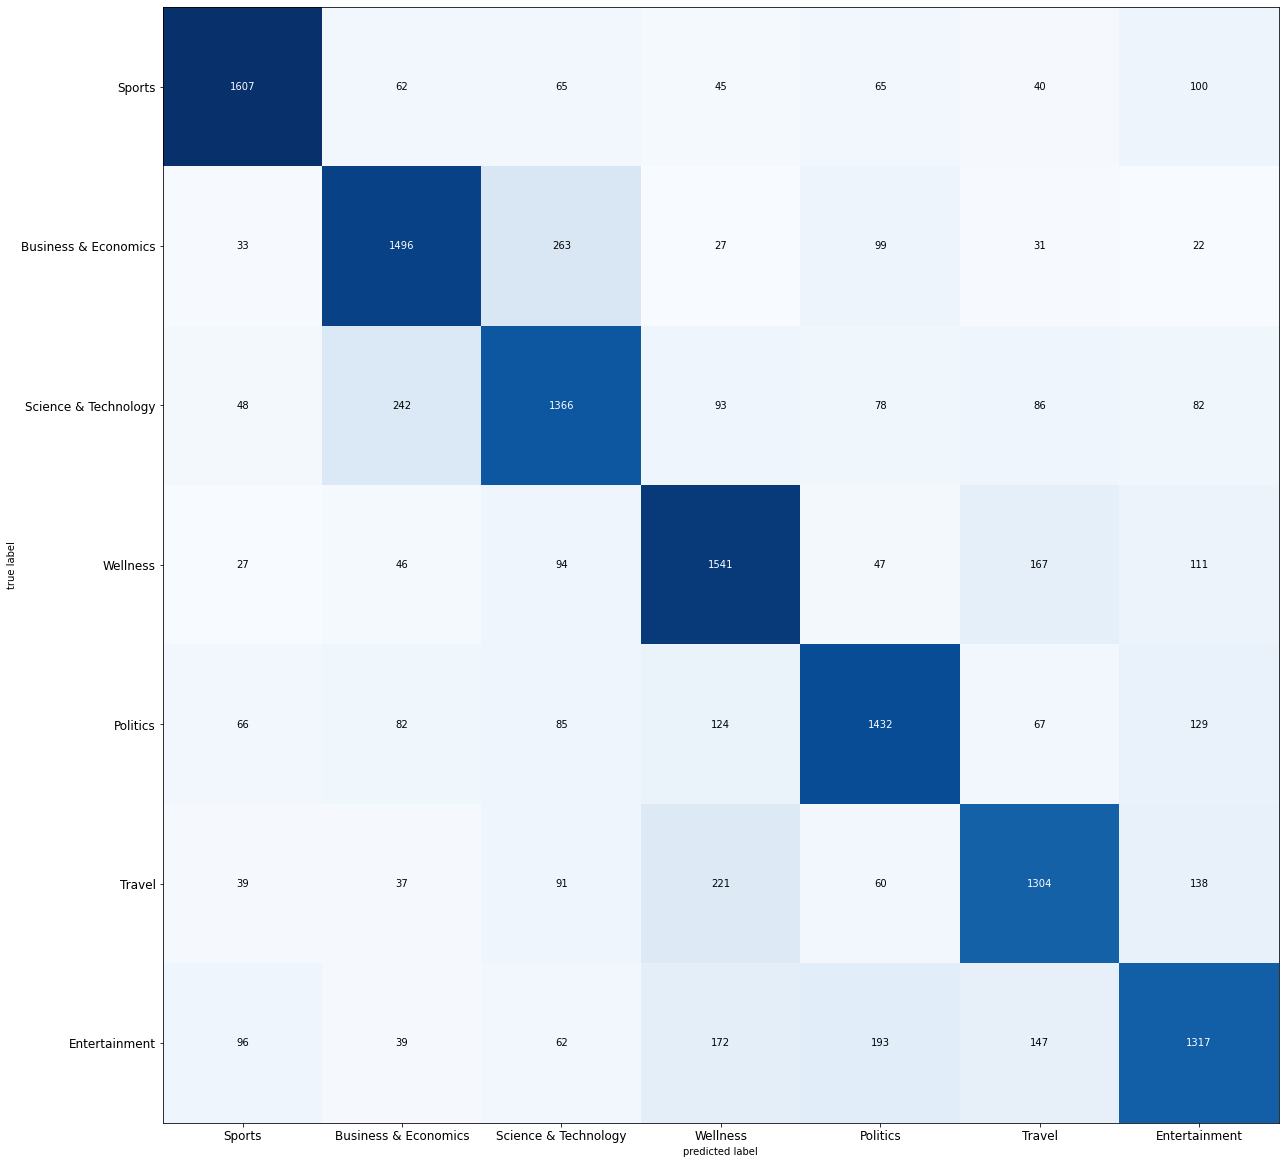

In [28]:
nb_cm = confusion_matrix(y_test, nb_predictions)

plt.figure()

plot_confusion_matrix(nb_cm, figsize = (20,30), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(7), labels, fontsize = 12)
plt.yticks(range(7), labels, fontsize = 12)

plt.show()

In [29]:
print("Accuracy score: ", accuracy_score(y_test, nb_predictions))
print("Recall score: ", recall_score(y_test, nb_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, nb_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, nb_predictions, average = 'weighted'))

Accuracy score:  0.7247911264765198
Recall score:  0.7247911264765198
Precision score:  0.7254988180007065
F1 score:  0.7247650716797762


In [30]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = nb.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Wellness', 'blue')))
    elif predicted_label[0] == 4:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Politics', 'blue')))
    elif predicted_label[0] == 5:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Travel', 'blue')))
    elif predicted_label[0] == 6:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Entertainment', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Politics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Science & Technology
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - Politics
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Politics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Entertainment
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Sports
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් ත

**Logistic Regression**

In [31]:
lr = LogisticRegression(max_iter=2000, solver='sag')

# Wrap the SVM classifier with the OneVsRestClassifier to enable multi-class classification
one_vs_rest_lr = OneVsRestClassifier(lr)

one_vs_rest_lr.fit(training_data, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=2000, solver='sag'))

In [32]:
lr_predictions = one_vs_rest_lr.predict(testing_data)
print(lr_predictions)

[5 4 6 ... 2 6 1]


<Figure size 432x288 with 0 Axes>

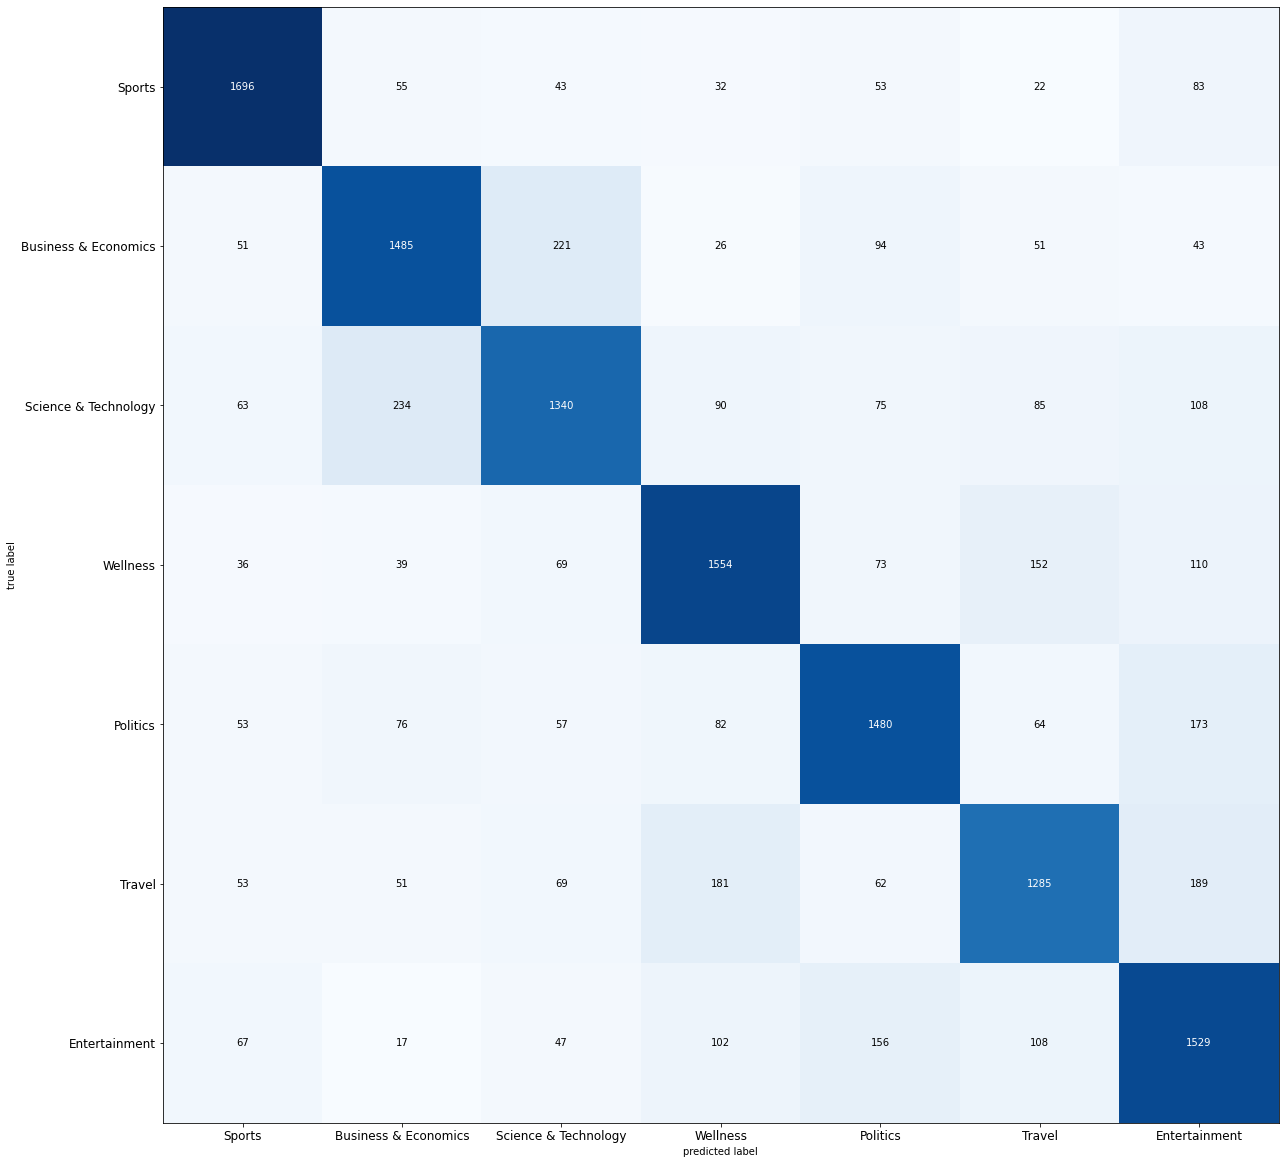

In [33]:
lr_cm = confusion_matrix(y_test, lr_predictions)

plt.figure()

plot_confusion_matrix(lr_cm, figsize = (20,30), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(7), labels, fontsize = 12)
plt.yticks(range(7), labels, fontsize = 12)

plt.show()

In [34]:
print("Accuracy score: ", accuracy_score(y_test, lr_predictions))
print("Recall score: ", recall_score(y_test, lr_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, lr_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, lr_predictions, average = 'weighted'))

Accuracy score:  0.746830884471334
Recall score:  0.746830884471334
Precision score:  0.7471439295122521
F1 score:  0.7464567188883557


In [35]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = one_vs_rest_lr.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Wellness', 'blue')))
    elif predicted_label[0] == 4:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Politics', 'blue')))
    elif predicted_label[0] == 5:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Travel', 'blue')))
    elif predicted_label[0] == 6:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Entertainment', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Entertainment
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Entertainment
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - Politics
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Politics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Entertainment
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Travel
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්ත

**Random Forest**

In [36]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(training_data, y_train)

RandomForestClassifier(random_state=42)

In [37]:
rf_predictions = rf.predict(testing_data)
print(rf_predictions)

[5 4 6 ... 2 6 1]


<Figure size 432x288 with 0 Axes>

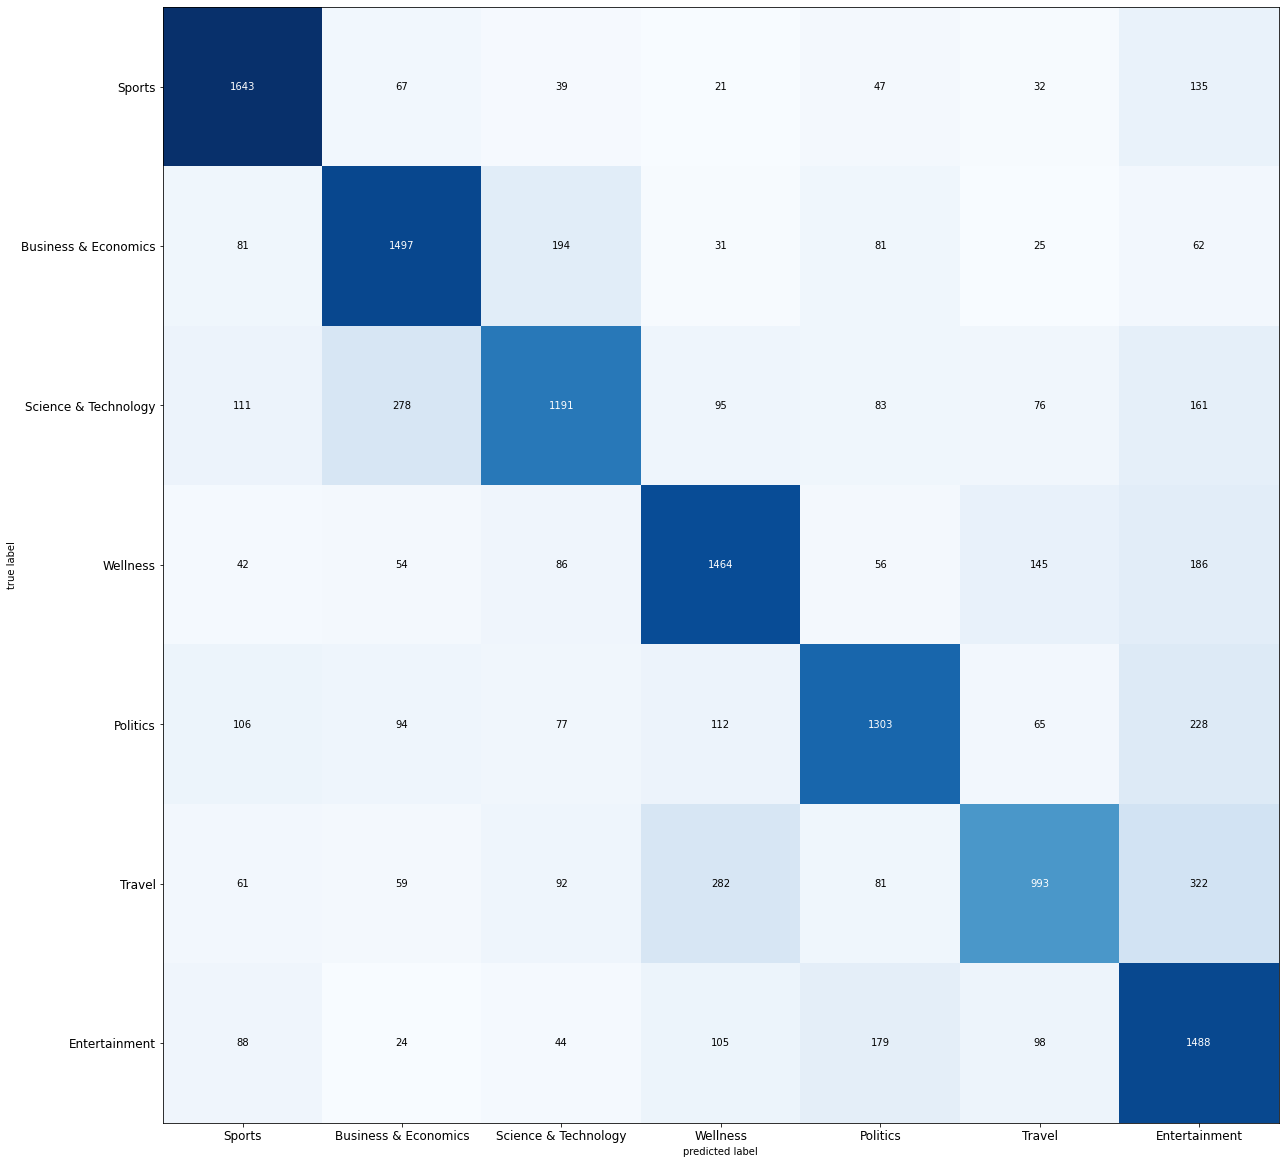

In [38]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure()

plot_confusion_matrix(rf_cm, figsize = (20,30), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(7), labels, fontsize = 12)
plt.yticks(range(7), labels, fontsize = 12)

plt.show()

In [39]:
print("Accuracy score: ", accuracy_score(y_test, rf_predictions))
print("Recall score: ", recall_score(y_test, rf_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, rf_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, rf_predictions, average = 'weighted'))

Accuracy score:  0.6899308556611927
Recall score:  0.6899308556611927
Precision score:  0.6937183436250389
F1 score:  0.6879650974419375


In [40]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = rf.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Wellness', 'blue')))
    elif predicted_label[0] == 4:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Politics', 'blue')))
    elif predicted_label[0] == 5:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Travel', 'blue')))
    elif predicted_label[0] == 6:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Entertainment', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Politics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Entertainment
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - Politics
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Politics
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Entertainment
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Travel
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා ක්‍රිකට් තරගාවලිය

**XGBoost in Gradient Boosting algorithms**

In [41]:
xgb = XGBClassifier(
                    objective='multi:softmax',
                    num_class=len(label_encoder.classes_)
                    )

xgb.fit(training_data, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=7, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

In [42]:
xgb_predictions = xgb.predict(testing_data)
print(xgb_predictions)

[5 4 6 ... 2 6 1]


<Figure size 432x288 with 0 Axes>

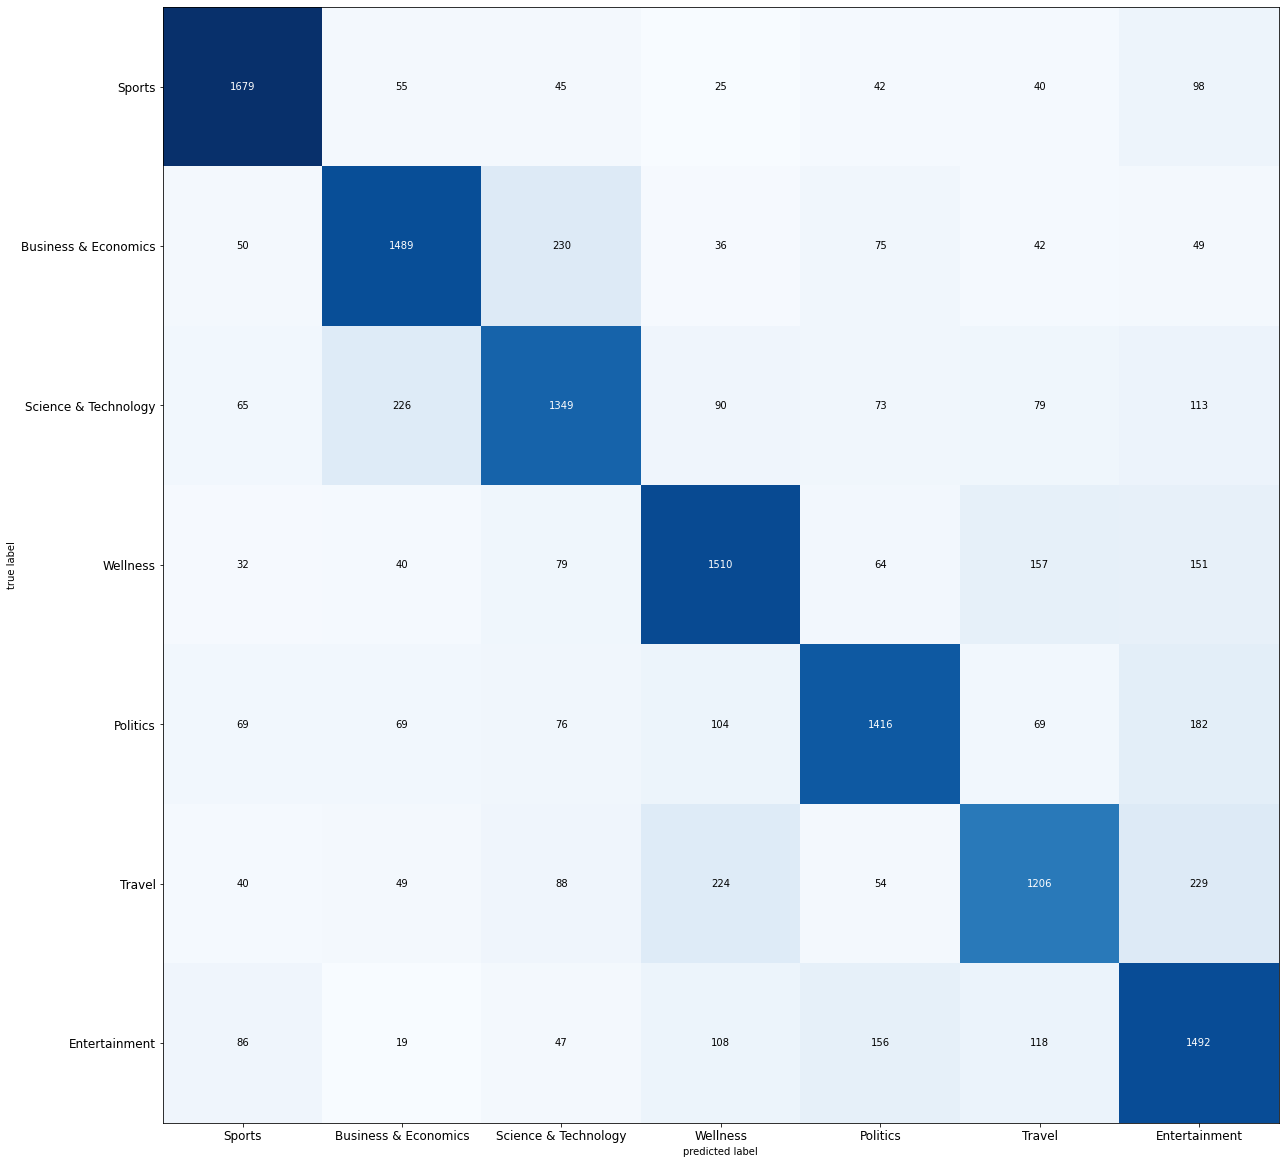

In [43]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plt.figure()

plot_confusion_matrix(xgb_cm, figsize = (20,30), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(7), labels, fontsize = 12)
plt.yticks(range(7), labels, fontsize = 12)

plt.show()

In [44]:
print("Accuracy score: ", accuracy_score(y_test, xgb_predictions))
print("Recall score: ", recall_score(y_test, xgb_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, xgb_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, xgb_predictions, average = 'weighted'))

Accuracy score:  0.7304091040046097
Recall score:  0.7304091040046097
Precision score:  0.7317184888650115
F1 score:  0.7302342009915376


In [45]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    predicted_label = xgb.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Wellness', 'blue')))
    elif predicted_label[0] == 4:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Politics', 'blue')))
    elif predicted_label[0] == 5:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Travel', 'blue')))
    elif predicted_label[0] == 6:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Entertainment', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Entertainment
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - Politics
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Entertainment
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Entertainment
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Travel
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා 

**LightGBM in Gradient Boosting algorithms**

In [46]:
lgbm = LGBMClassifier(objective='multiclass',
                      num_class=len(label_encoder.classes_)
                     )

training_data = training_data.astype(np.float32)
lgbm.fit(training_data, y_train)

LGBMClassifier(num_class=7, objective='multiclass')

In [47]:
testing_data = testing_data.astype(np.float32)
lgbm_predictions = lgbm.predict(testing_data)
print(lgbm_predictions)

[5 4 6 ... 2 6 1]


<Figure size 432x288 with 0 Axes>

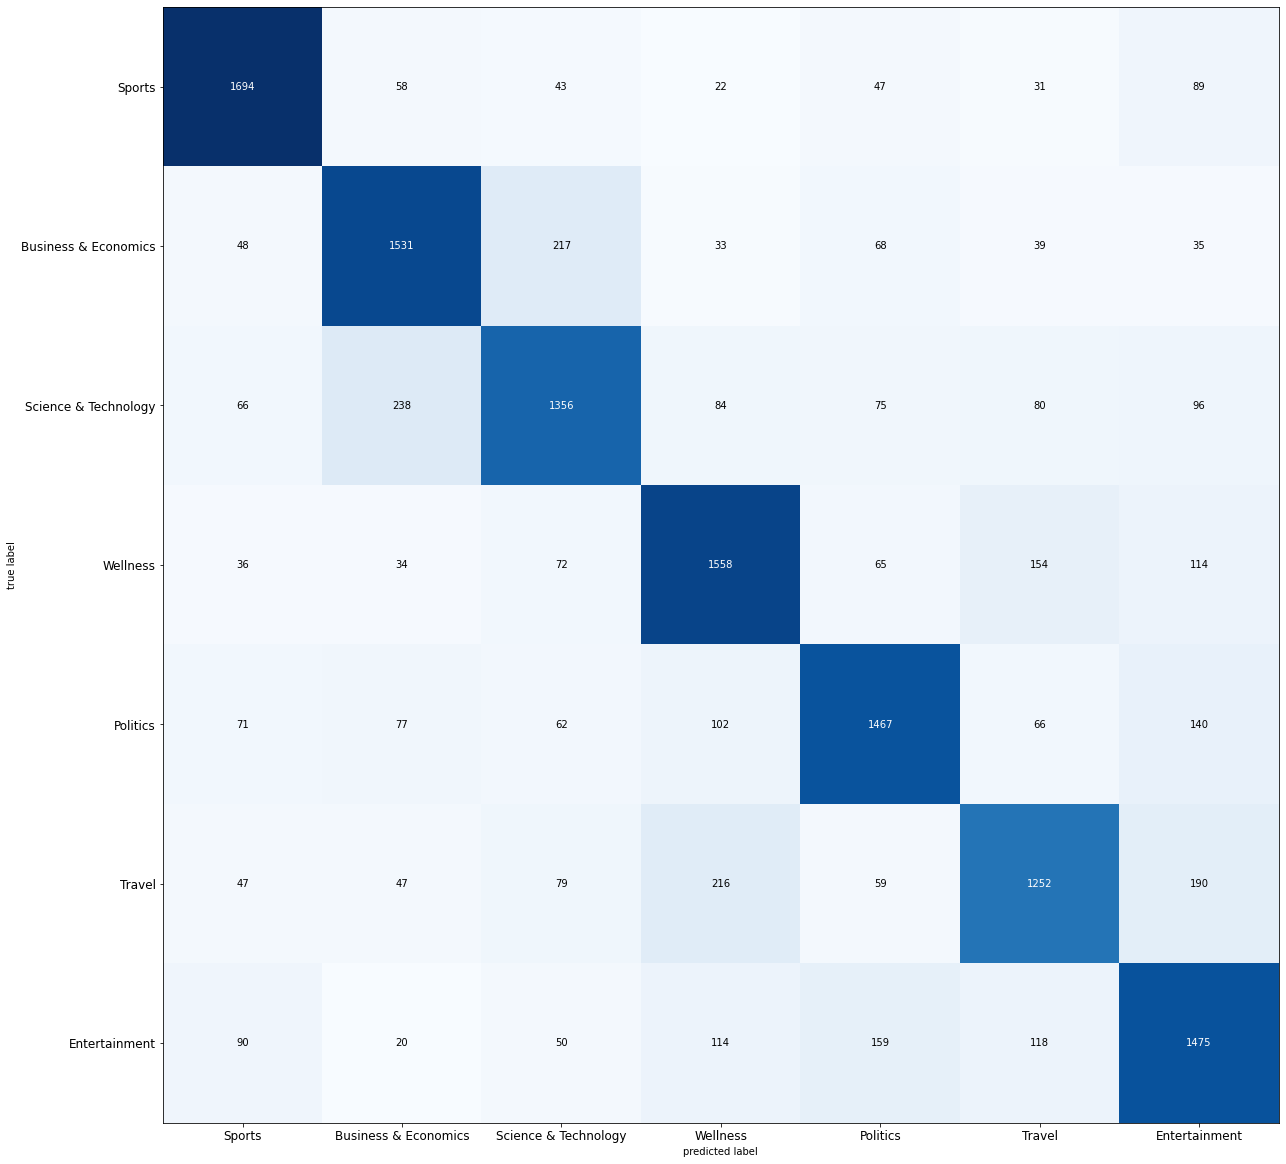

In [48]:
lgbm_cm = confusion_matrix(y_test, lgbm_predictions)

plt.figure()

plot_confusion_matrix(lgbm_cm, figsize = (20,30), hide_ticks = True, cmap = plt.cm.Blues)

plt.xticks(range(7), labels, fontsize = 12)
plt.yticks(range(7), labels, fontsize = 12)

plt.show()

In [49]:
print("Accuracy score: ", accuracy_score(y_test, lgbm_predictions))
print("Recall score: ", recall_score(y_test, lgbm_predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, lgbm_predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, lgbm_predictions, average = 'weighted'))

Accuracy score:  0.7442379717660617
Recall score:  0.7442379717660617
Precision score:  0.7439065704518353
F1 score:  0.7436307895048934


In [50]:
for paragraph in paragraphs:
    transformed_text = count_vector.transform([paragraph])
    transformed_text = transformed_text.astype(np.float32)
    predicted_label = lgbm.predict(transformed_text)

    if predicted_label[0] == 0:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Sports', 'blue')))
    elif predicted_label[0] == 1:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Business & Economics', 'blue')))
    elif predicted_label[0] == 2:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Science & Technology', 'blue')))
    elif predicted_label[0] == 3:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Wellness', 'blue')))
    elif predicted_label[0] == 4:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Politics', 'blue')))
    elif predicted_label[0] == 5:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Travel', 'blue')))
    elif predicted_label[0] == 6:
        print('{} - {}'.format(colored(paragraph, 'yellow'), colored('Entertainment', 'blue')))
    else:
        print('Other predicted_label')

T20 ලෝක කුසලානය සඳහා වන ශ්‍රී ලංකා කාන්තා සංචිතය ප්‍රකාශයට පත් කෙරේ - Sports
නිදහස් සේවකයාට බදු පැනවීම: බදු අය කරන්නේ කාටද? - Business & Economics
වනජීවී වෙළඳාමෙන් වෛරස් අවදානම් පිළිබඳ නව සාක්ෂි - Entertainment
ICC කාන්තා T20 ලෝක කුසලානය 2023 | නිල කණ්ඩායම් අනුග්‍රාහකයා හඳුන්වාදීම සහ ශ්‍රී ලංකා කණ්ඩායමේ ජර්සි එළිදැක්වීම. - Sports
නිදහස් දින සැමරුම සම්බන්ධයෙන් ශ්‍රී ලංකා කතෝලික සභාව ජනපතිට බැණ වදියි - Politics
IMF ආධාර වැඩසටහන ගැන SJB නායකයාගේ අනතුරු ඇඟවීම - Entertainment
#GalaxyS23 සමඟින් ඔහුගේ වැඩිදියුණු කළ ඡායාරූප පෙන්වයි. Galaxy සමඟ JK හි ඔබ කැමතිම ඡායාරූපය කුමක්ද? - Entertainment
Falcon 9 සිය 200 වැනි සාර්ථක මෙහෙයුම දියත් කළ අතර, තවත් SpaceX Starlink චන්ද්‍රිකා 53ක් අද උදෑසන කක්ෂයට ලබා දුන්නේය. - Science & Technology
කැලඹිලි සහිත ආර්ථික කාලවලදී, කොටස් මිලදී ගැනීම සඳහා ආන්තික ණය භාවිතා කිරීම ගැන සැලකිලිමත් වන්න - Business & Economics
ඉදිරියේදී පැවැත්වීමට නියමිත බෝඩර් ගවස්කාර් කුසලානයේ විස්තර විචාරකයෙකු ලෙස දිනේෂ් කාර්තික් කටයුතු කරනු ඇත - Travel
මෙවර විස්සයි විස්ස ලෝක කුසලාන කාන්තා 

## Saving All the Models

In [51]:
# Saving the NB Model
joblib.dump(nb, '7_classes_multinomial_nb_model.joblib')

# Saving the OneVsRestClassifier with logistic regression base classifier
joblib.dump(one_vs_rest_lr, '7_classes_one_vs_rest_lr_model.joblib')

# Saving the RandomForestClassifier model
joblib.dump(rf, '7_classes_random_forest_model.joblib')

# Saving the XGBoost model
joblib.dump(rf, '7_classes_xgboost_model.joblib')
    
# Saving the LightGBM model
joblib.dump(lgbm, '7_classes_lgbm_classifier_model.joblib')

['7_classes_lgbm_classifier_model.joblib']